<h1 style="color:blue;">Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks</h1>

<h3 style="color:green;">Objective:
You are required to model the progression of diabetes using the available independent variables.
This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially 
aid in designing better treatment plans and preventive measures. 
The model will provide insights into the dynamics of diabetes progression in patients.</h3>

<h2 style="color:blue;">1. Loading and Preprocessing </h2>

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print(df)


          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

In [3]:
df.shape

(442, 11)

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [5]:
## Display the first few rows of the dataset
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [6]:
## Display the last few rows of the dataset
df.tail(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
432,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617,173.0
433,-0.027310,-0.044642,-0.060097,-0.029770,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362,72.0
434,0.016281,-0.044642,0.001339,0.008101,0.005311,0.010899,0.030232,-0.039493,-0.045424,0.032059,49.0
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0
436,-0.056370,-0.044642,-0.074108,-0.050427,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)


Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


<h2 style="color:blue;">2. Exploratory Data Analysis (EDA) </h2>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of the dataset
summary = df.describe()
print(summary)



                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

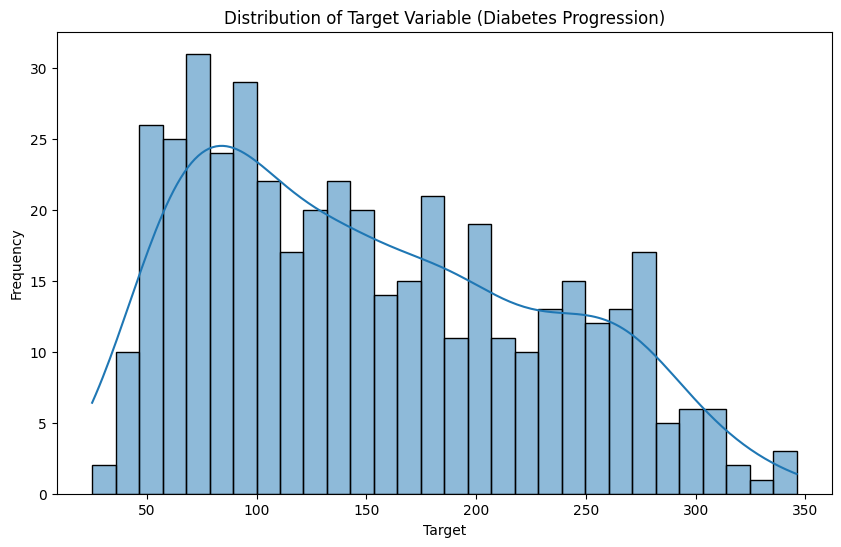

In [34]:
# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True, bins=30)
plt.title('Distribution of Target Variable (Diabetes Progression)')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()


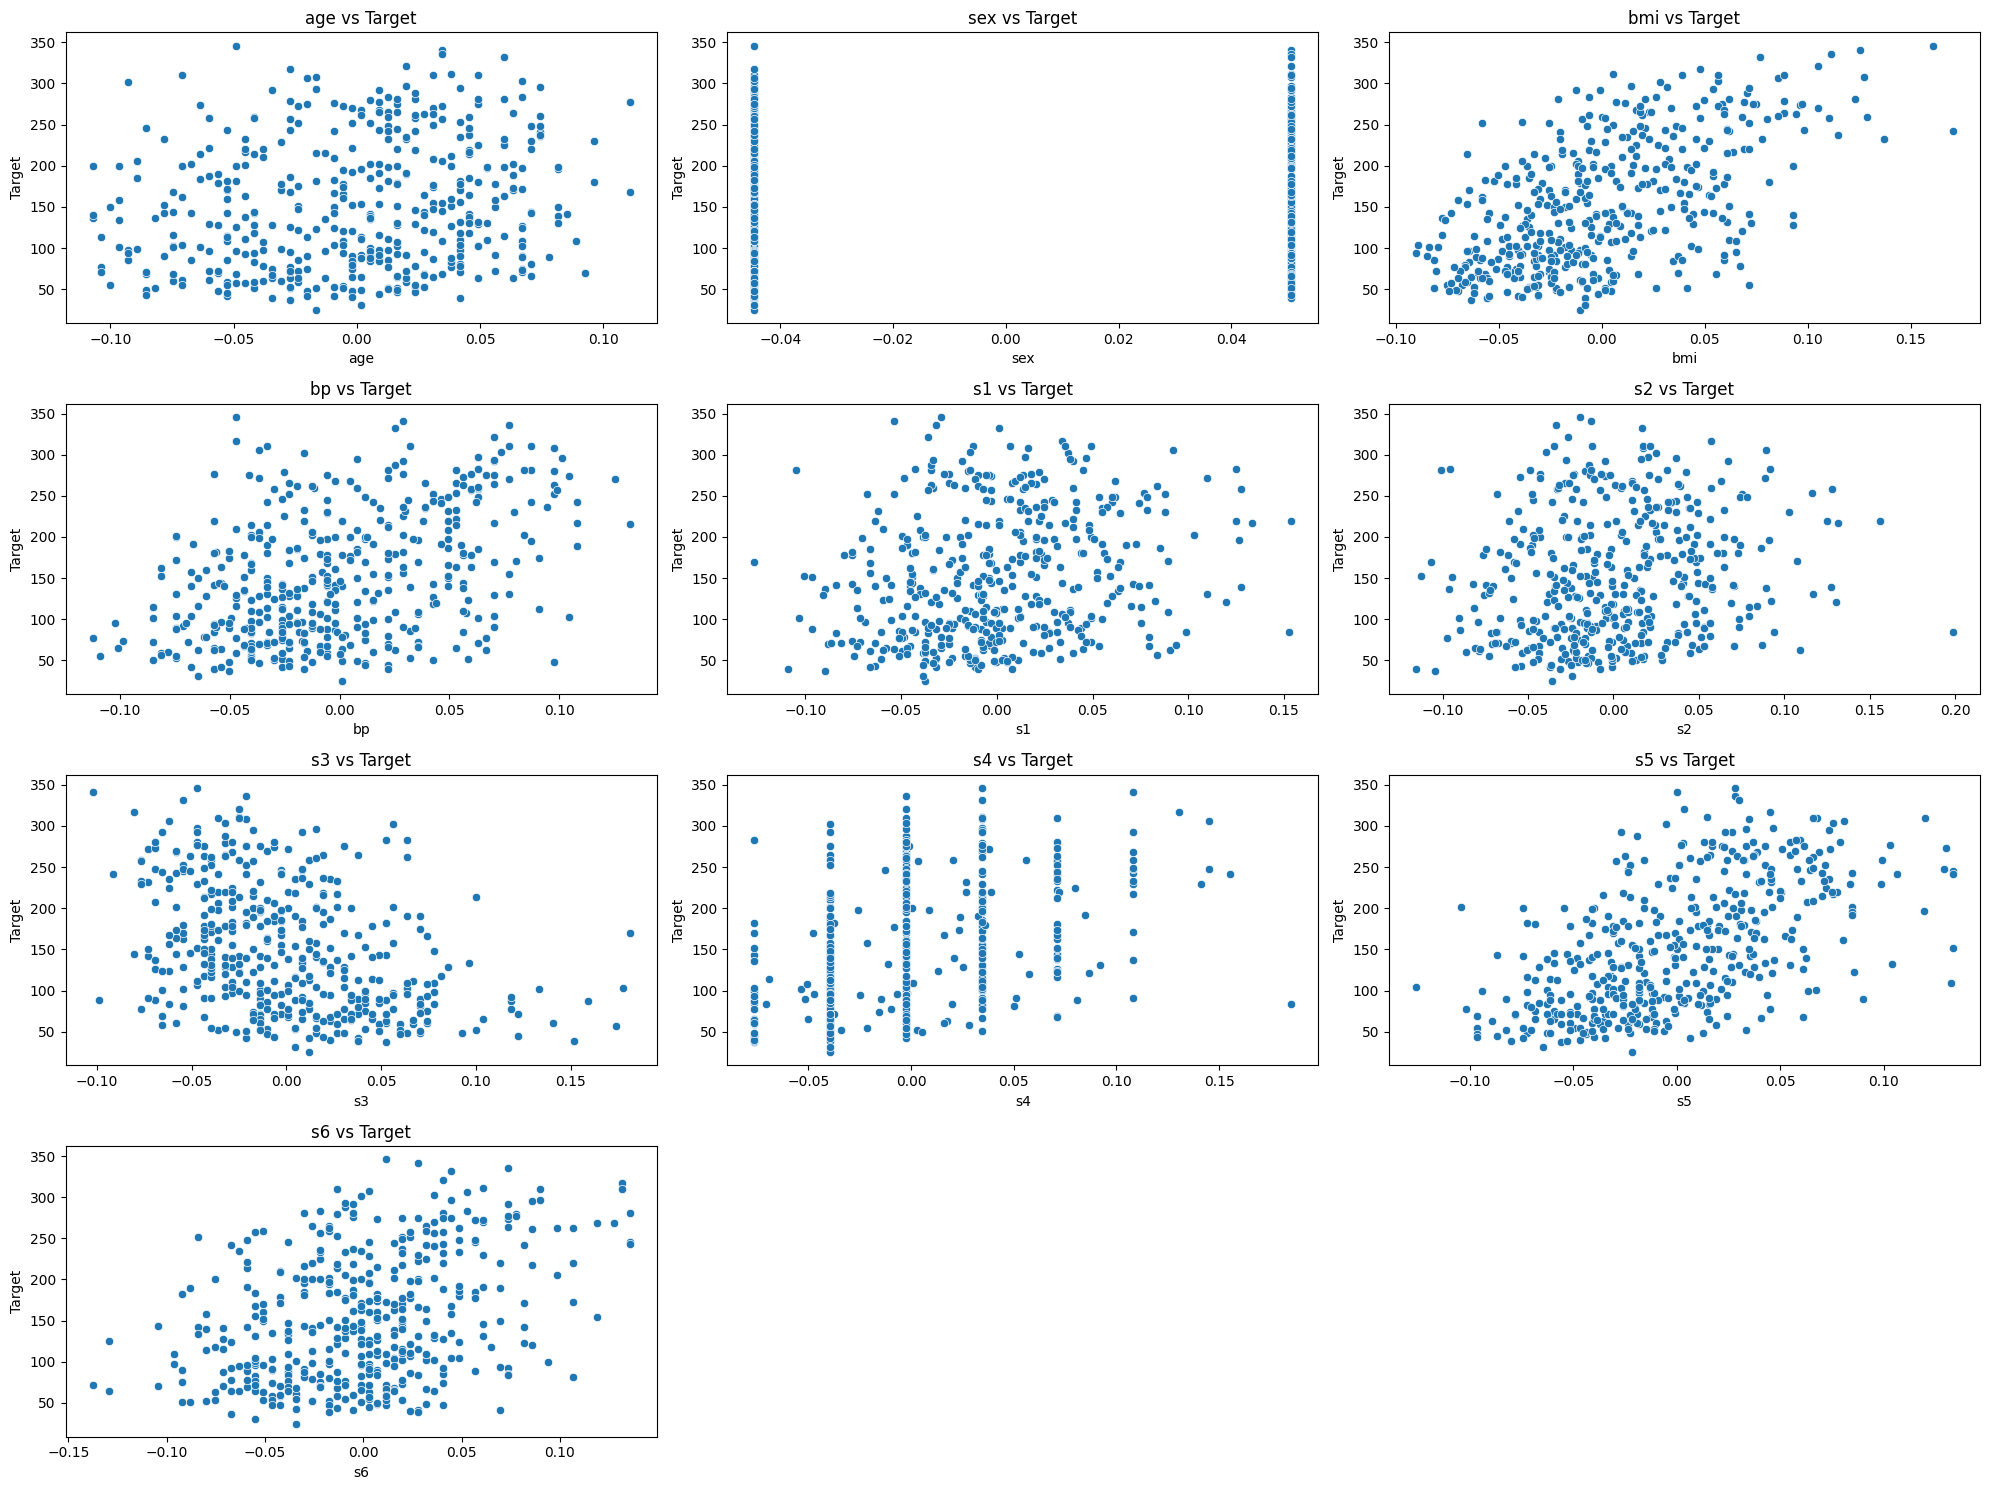

In [35]:
# Scatter plots of each feature against the target variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


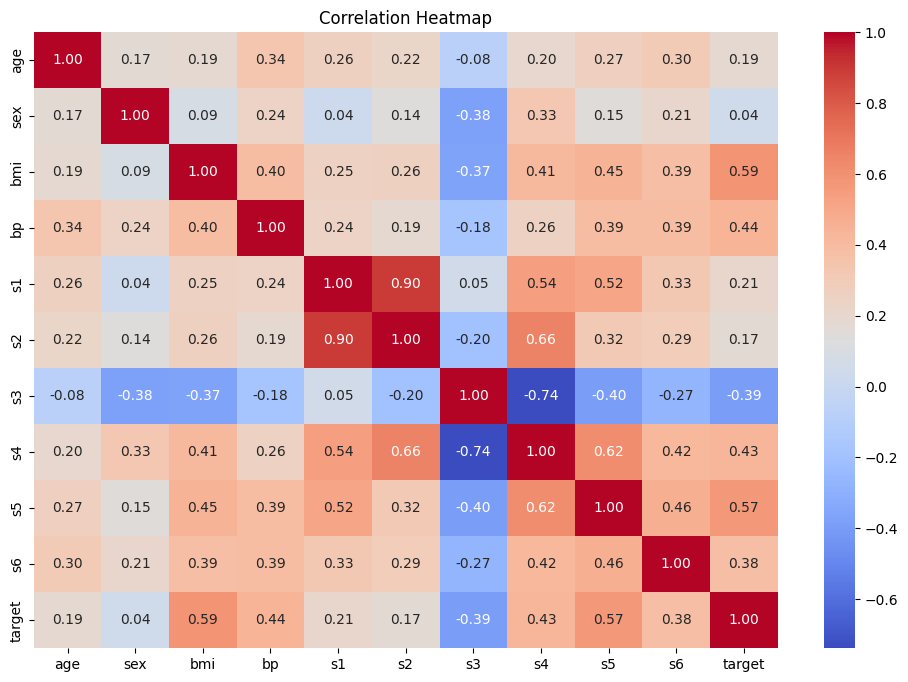

In [36]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Features like BMI, blood pressure, and certain serum measurements (like s5) are likely to be significant predictors of diabetes progression.
    
The target variable is reasonably well-distributed, making it suitable for regression modeling.
                                                                      
Understanding these relationships helps in selecting the right features and building a more accurate and interpretable model.

<h2 style="color:blue;">Building the ANN Model</h2>

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, input_dim=df.shape[1]-1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) 

# Output layer
model.add(Dense(units=1, activation='linear'))

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,819 (11.01 KB)

 Trainable params: 2,819 (11.01 KB)

 Non-trainable params: 0 (0.00 B)

<h2 style="color:blue;">4. Training the ANN Model</h2>

In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((353, 10), (89, 10), (353,), (89,))

In [40]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 30635.7637 - mean_squared_error: 30635.7637 - val_loss: 22466.7598 - val_mean_squared_error: 22466.7598
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30608.3359 - mean_squared_error: 30608.3359 - val_loss: 22437.5000 - val_mean_squared_error: 22437.5000
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30571.0527 - mean_squared_error: 30571.0527 - val_loss: 22397.3164 - val_mean_squared_error: 22397.3164
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30519.1992 - mean_squared_error: 30519.1992 - val_loss: 22341.1699 - val_mean_squared_error: 22341.1699
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30445.8750 - mean_squared_error: 30445.8750 - val_loss: 22262.8398 - val_mean_squared_error: 22262.8398
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30343.2051 - mean_squared_error: 30343.2051 - val_loss: 22155.3105 - val_mean_squared_error: 22155.3105
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━

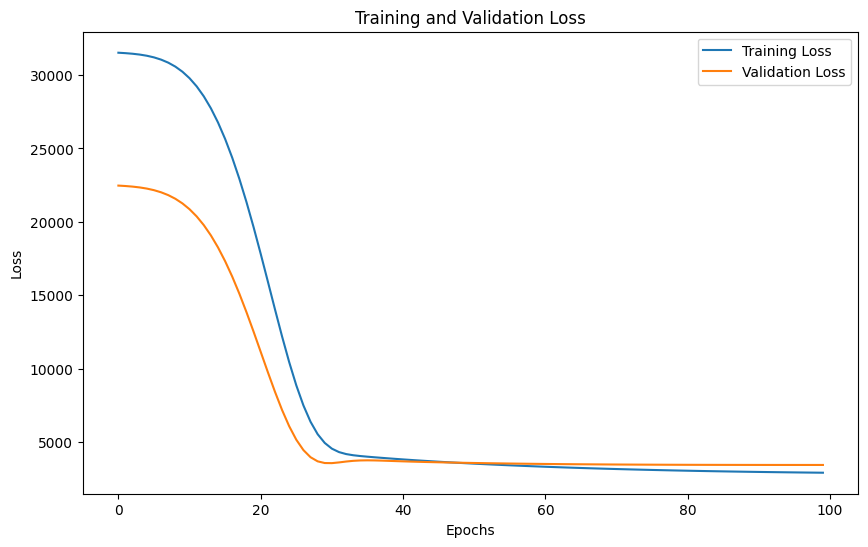

In [41]:
# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<h2 style="color:blue;">Evaluating the Model</h2>

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculating R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mean Squared Error: 2908.1026
R² Score: 0.4511


<h2 style="color:blue;">6. Improving the Model</h2> 

In [43]:
# Define a new model with 5 hidden layers
model_improved = Sequential()

# Input layer and first hidden layer
model_improved.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))

# Adding additional hidden layers
model_improved.add(Dense(units=128, activation='relu'))
model_improved.add(Dense(units=64, activation='relu'))
model_improved.add(Dense(units=64, activation='relu'))
model_improved.add(Dense(units=32, activation='relu'))
model_improved.add(Dense(units=32, activation='relu'))

# Output layer
model_improved.add(Dense(units=1, activation='linear'))

# Compile the model
model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 30633.5195 - mean_squared_error: 30633.5195 - val_loss: 22435.9082 - val_mean_squared_error: 22435.9082
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30536.7090 - mean_squared_error: 30536.7090 - val_loss: 22218.4219 - val_mean_squared_error: 22218.4219
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30141.8789 - mean_squared_error: 30141.8789 - val_loss: 21322.0449 - val_mean_squared_error: 21322.0449
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28538.0078 - mean_squared_error: 28538.0078 - val_loss: 18013.9316 - val_mean_squared_error: 18013.9316
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22921.6348 - mean_squared_error: 22921.6348 - val_loss: 8961.9600 - val_mean_squared_error: 8961.9600
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9969.7256 - mean_squared_error: 9969.7256 - val_loss: 6784.5571 - val_mean_squared_error: 6784.5571
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

In [45]:
# Predicting on the test data
y_pred_improved = model_improved.predict(X_test)

# Calculating Mean Squared Error for the improved model
mse_improved = mean_squared_error(y_test, y_pred_improved)
print(f"Improved Model (5 Hidden Layers) Mean Squared Error: {mse_improved:.4f}")

# Calculating R² Score for the improved model
r2_improved = r2_score(y_test, y_pred_improved)
print(f"Improved Model (5 Hidden Layers) R² Score: {r2_improved:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Improved Model (5 Hidden Layers) Mean Squared Error: 2700.0440
Improved Model (5 Hidden Layers) R² Score: 0.4904


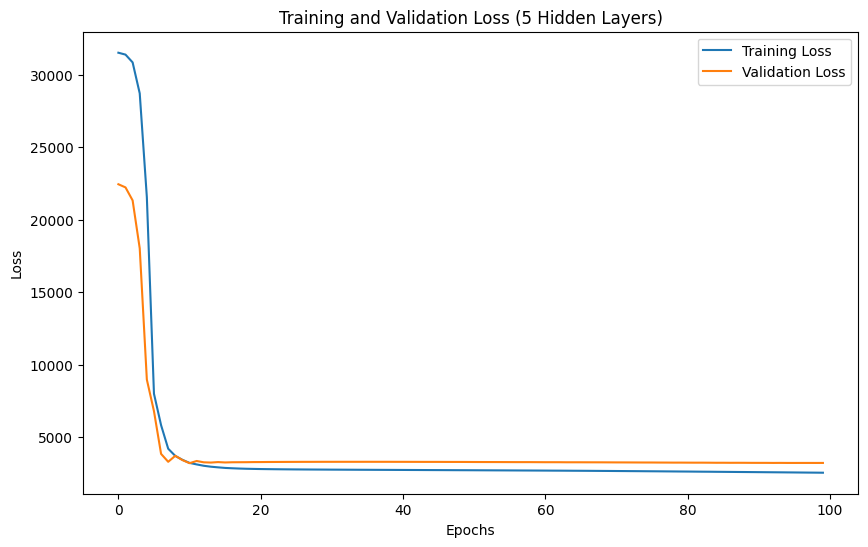

In [46]:
# Plotting the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (5 Hidden Layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
